In [1]:
import io

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import plotly.express as px

In [5]:
from plotly.subplots import make_subplots

In [6]:
import plotly.graph_objects as go

In [7]:
import seaborn as sns

In [58]:
loan_approval_dataset = pd.read_csv("loan_approval_dataset.csv")#csv file-> row with inside simple comma seperated data

In [42]:
print(loan_approval_dataset.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [43]:
traning_df = loan_approval_dataset[[' income_annum', ' loan_amount',' cibil_score',' bank_asset_value',' commercial_assets_value',
       ' luxury_assets_value']]
traning_df.describe()
#selection of features

,income_annum,loan_amount,cibil_score,bank_asset_value,commercial_assets_value,luxury_assets_value
count,4.269000e+03,4.269000e+03,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03
mean,5.059124e+06,1.513345e+07,599.936051,4.976692e+06,4.973155e+06,1.512631e+07
std,2.806840e+06,9.043363e+06,172.430401,3.250185e+06,4.388966e+06,9.103754e+06
min,2.000000e+05,3.000000e+05,300.000000,0.000000e+00,0.000000e+00,3.000000e+05
25%,2.700000e+06,7.700000e+06,453.000000,2.300000e+06,1.300000e+06,7.500000e+06
50%,5.100000e+06,1.450000e+07,600.000000,4.600000e+06,3.700000e+06,1.460000e+07
75%,7.500000e+06,2.150000e+07,748.000000,7.100000e+06,7.600000e+06,2.170000e+07
max,9.900000e+06,3.950000e+07,900.000000,1.470000e+07,1.940000e+07,3.920000e+07


In [44]:
#View dataset statistics
print('Total number of rows: {0}\n\n'.format(len(traning_df.index)))
traning_df.describe(include='all')

Total number of rows: 4269




,income_annum,loan_amount,cibil_score,bank_asset_value,commercial_assets_value,luxury_assets_value
count,4.269000e+03,4.269000e+03,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03
mean,5.059124e+06,1.513345e+07,599.936051,4.976692e+06,4.973155e+06,1.512631e+07
std,2.806840e+06,9.043363e+06,172.430401,3.250185e+06,4.388966e+06,9.103754e+06
min,2.000000e+05,3.000000e+05,300.000000,0.000000e+00,0.000000e+00,3.000000e+05
25%,2.700000e+06,7.700000e+06,453.000000,2.300000e+06,1.300000e+06,7.500000e+06
50%,5.100000e+06,1.450000e+07,600.000000,4.600000e+06,3.700000e+06,1.460000e+07
75%,7.500000e+06,2.150000e+07,748.000000,7.100000e+06,7.600000e+06,2.170000e+07
max,9.900000e+06,3.950000e+07,900.000000,1.470000e+07,1.940000e+07,3.920000e+07


In [45]:
max_income = traning_df[' income_annum'].max()
print("What is the maximum income? \t\t\t\tAnswer: ${max_income:.2f}".format(max_income = max_income))

What is the maximum income? 				Answer: $9900000.00


In [46]:
mean_luxury_asset_value = traning_df[' luxury_assets_value'].mean()
print("What is the mean of luxury asset values? \t\tAnswer: ${mean:.4f} ".format(mean = mean_luxury_asset_value))

What is the mean of luxury asset values? 		Answer: $15126305.9264 


In [47]:
# types = traning_df[' education'].nunique()
# print("What are the educational status catagories? \t\tAnswer: {number}".format(number = types))

In [48]:
# print(f'The least income is {traning_df. income_annum.min():.1f}px long')
# print(f'The least income is {traning_df. income_annum.max():.1f}px long')
#:.if is used to 4.3344343->4.33

In [49]:
print(loan_approval_dataset.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [59]:
loan_approval_dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [60]:
loan_approval_dataset[' education'].replace({
    ' Graduate': 1,
    ' Not Graduate': 0,
    ' Unknown': np.nan,
}, inplace=True)

<ipython-input-60-57398a934e07>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-60-57398a934e07>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [62]:
loan_approval_dataset[' self_employed'].replace({
    ' No': 0,
    ' Yes': 1,
    ' Unknown': np.nan,
}, inplace=True)

<ipython-input-62-0402fe3de9c8>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-62-0402fe3de9c8>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [64]:
loan_approval_dataset[' loan_status'].replace({
    ' Rejected': 0,
    ' Approved': 1,
    ' Unknown': np.nan,
}, inplace=True)

<ipython-input-64-29f75c2dc8f4>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-64-29f75c2dc8f4>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [66]:
loan_approval_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   loan_id                    4269 non-null   int64
 1    no_of_dependents          4269 non-null   int64
 2    education                 4269 non-null   int64
 3    self_employed             4269 non-null   int64
 4    income_annum              4269 non-null   int64
 5    loan_amount               4269 non-null   int64
 6    loan_term                 4269 non-null   int64
 7    cibil_score               4269 non-null   int64
 8    residential_assets_value  4269 non-null   int64
 9    commercial_assets_value   4269 non-null   int64
 10   luxury_assets_value       4269 non-null   int64
 11   bank_asset_value          4269 non-null   int64
 12   loan_status               4269 non-null   int64
dtypes: int64(13)
memory usage: 433.7 KB


In [67]:
# creating plots of features against each other , color coded by class
for x_axis_data , y_axis_data in [(' income_annum',' loan_amount')]:
    px.scatter(loan_approval_dataset, x=x_axis_data, y=y_axis_data, color=' loan_status').show()
#from the below graph we can infer that as the income increases the loan amount demanded also increases

In [68]:
for x_axis_data , y_axis_data in [(' cibil_score',' bank_asset_value')]:
    px.scatter(loan_approval_dataset, x=x_axis_data, y=y_axis_data, color=' loan_status').show()
#from the below graph we can infer that for the same bank_asset_value the applicant with the higher cibil_score gets approved and the threshold is of 550 cibil score

In [69]:
for x_axis_data , y_axis_data in [(' income_annum',' loan_amount')]:
    px.scatter(loan_approval_dataset, x=x_axis_data, y=y_axis_data, color=' loan_status').show()

In [70]:
#@title Plot three features in 3D by entering their names and running this cell
x_axis_data = ' income_annum'  # @param {type: "string"}
y_axis_data = ' cibil_score'  # @param {type: "string"}
z_axis_data = ' loan_amount'  # @param {type: "string"}
#creating a plot
px.scatter_3d(
    loan_approval_dataset,
    x=x_axis_data,
    y=y_axis_data,
    z=z_axis_data,
    color=' loan_status',
#displaying the plot
).show()

In [71]:
#Iniciating Normalization
# Calculate the Z-scores of each numerical column in the raw data and write
# them into a new DataFrame named df_norm.
feature_mean = loan_approval_dataset.mean(numeric_only=True)
feature_std = loan_approval_dataset.std(numeric_only=True)
numerical_features =  loan_approval_dataset.select_dtypes('number').columns
normalized_dataset = (
    loan_approval_dataset[numerical_features] - feature_mean
) / feature_std

# Copy the class to the new dataframe
normalized_dataset[' loan_status'] = loan_approval_dataset[' loan_status']

# Examine some of the values of the normalized training set. Notice that most
# Z-scores fall between -2 and +2.
normalized_dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,-1.731442,-0.294067,0.995443,-1.007170,1.617790,1.632860,0.192594,1.032671,-0.779966,2.876952,0.831931,0.930195,1
1,-1.730631,-1.473375,-1.004343,0.992648,-0.341710,-0.324376,-0.508031,-1.060927,-0.733838,-0.631847,-0.694912,-0.515876,0
2,-1.729820,0.295587,0.995443,-1.007170,1.439653,1.610745,1.593844,-0.544777,-0.057294,-0.107806,1.996286,2.407034,0
3,-1.729008,0.295587,0.995443,-1.007170,1.119008,1.721323,-0.508031,-0.770955,1.649444,-0.381219,0.897838,0.899428,0
4,-1.728197,1.474894,-1.004343,0.992648,1.689044,1.002564,1.593844,-1.263907,0.757635,0.735218,1.567891,0.007171,0


In [72]:
import keras

In [73]:
keras.utils.set_random_seed(42)#to make output same for everyone

In [74]:
#agssining lables
# Create a column setting the Approved label to '1' and the Not Approved label to '0'
# then show 10 randomly selected rows.
normalized_dataset['Class_Bool'] = (
    # Returns true if class is Approved, and false if class is Not Approved
    normalized_dataset[' loan_status'] ==  ' Approved'
).astype(int)
normalized_dataset.sample(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Class_Bool
1703,-0.349696,1.474894,0.995443,-1.007170,0.121445,0.504961,1.593844,-1.026130,-0.149550,1.145337,0.063017,0.714823,0,0
1173,-0.779717,-0.294067,0.995443,-1.007170,0.299581,-0.125335,-0.508031,-0.005429,-0.426318,1.031415,0.293691,0.530218,1,0
308,-1.481543,0.295587,0.995443,-1.007170,1.617790,0.527077,0.542907,-0.857946,-0.503198,2.557970,1.469031,0.499451,0,0
1322,-0.658824,-0.294067,0.995443,-1.007170,0.406463,0.914101,-0.508031,0.029368,0.388611,1.327612,0.733071,1.299405,1,0
3271,0.922516,0.295587,-1.004343,0.992648,0.263954,-0.114277,0.192594,0.800694,0.650003,-0.130590,0.030064,1.053265,1,0
3539,1.139961,0.885240,0.995443,0.992648,-0.127946,-0.291203,-0.508031,0.452727,0.957523,-1.087535,-0.585067,0.622521,1,0
1522,-0.496552,0.885240,0.995443,-1.007170,-0.591100,-0.180624,0.192594,0.609312,0.388611,-0.882476,-0.749834,-0.023596,1,0
3399,1.026370,1.474894,-1.004343,0.992648,0.014563,-0.158509,0.542907,-0.422988,0.711507,0.894708,0.469443,-0.085131,0,0
1402,-0.593916,0.295587,0.995443,0.992648,-0.626728,-0.733516,0.192594,-0.080821,0.004210,0.028901,-0.804757,-0.331271,1,0
1829,-0.247465,-0.883721,-1.004343,0.992648,-0.733609,-1.009962,0.893219,-0.475183,-0.564702,-0.745769,-0.387346,-0.331271,0,0


In [75]:
#to divide dataset into parts for training , validation ...
# Create indices at the 80th and 90th percentiles
number_samples = len(normalized_dataset)
index_80th = round(number_samples * 0.8)
index_90th = index_80th + round(number_samples * 0.1)

# Randomize order and split into train, validation, and test with a .8, .1, .1 split
shuffled_dataset = normalized_dataset.sample(frac=1, random_state=100)
train_data = shuffled_dataset.iloc[0:index_80th]
validation_data = shuffled_dataset.iloc[index_80th:index_90th]
test_data = shuffled_dataset.iloc[index_90th:]

# Show the first five rows of the last split
test_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Class_Bool
1496,-0.517648,0.295587,-1.004343,0.992648,-0.911746,-0.821979,0.893219,-0.666565,-0.841470,-0.312865,-1.046415,-0.546643,0,0
2299,0.133874,-0.294067,-1.004343,-1.007170,-1.481782,-1.452275,0.542907,-1.524882,-0.887598,-1.133104,-1.430872,-1.346598,0,0
3164,0.835701,0.885240,-1.004343,-1.007170,-0.947373,-0.788805,1.243532,-1.200113,-1.164366,-1.087535,-0.826726,-0.608178,0,0
2903,0.623936,1.474894,0.995443,0.992648,1.083381,0.814581,-1.558969,1.206655,-0.410942,0.256745,0.194831,0.314846,1,0
3627,1.211361,-0.883721,0.995443,0.992648,1.332771,2.053058,0.542907,-0.225807,0.419363,0.484589,1.161465,2.130127,1,0


In [76]:
#prevention of lable leakage
label_columns = [' loan_status', 'Class_Bool']

train_features = train_data.drop(columns=label_columns)
train_labels = train_data['Class_Bool'].to_numpy()
validation_features = validation_data.drop(columns=label_columns)
validation_labels = validation_data['Class_Bool'].to_numpy()
test_features = test_data.drop(columns=label_columns)
test_labels = test_data['Class_Bool'].to_numpy()

In [77]:
#start traning the modle on the three features
# Name of the features we'll train our model on.
input_features = [
    ' income_annum',
    ' cibil_score',
    ' loan_amount',
]

In [78]:
# @title Define the functions that create and train a model.

import dataclasses


@dataclasses.dataclass()
class ExperimentSettings:
  """Lists the hyperparameters and input features used to train am model."""

  learning_rate: float
  number_epochs: int
  batch_size: int
  classification_threshold: float
  input_features: list[str]


@dataclasses.dataclass()
class Experiment:
  """Stores the settings used for a training run and the resulting model."""

  name: str
  settings: ExperimentSettings
  model: keras.Model
  epochs: np.ndarray
  metrics_history: keras.callbacks.History

  def get_final_metric_value(self, metric_name: str) -> float:
    """Gets the final value of the given metric for this experiment."""
    if metric_name not in self.metrics_history:
      raise ValueError(
          f'Unknown metric {metric_name}: available metrics are'
          f' {list(self.metrics_history.columns)}'
      )
    return self.metrics_history[metric_name].iloc[-1]


def create_model(
    settings: ExperimentSettings,
    metrics: list[keras.metrics.Metric],
) -> keras.Model:
  """Create and compile a simple classification model."""
  model_inputs = [
      keras.Input(name=feature, shape=(1,))
      for feature in settings.input_features
  ]
  # Use a Concatenate layer to assemble the different inputs into a single
  # tensor which will be given as input to the Dense layer.
  # For example: [input_1[0][0], input_2[0][0]]

  concatenated_inputs = keras.layers.Concatenate()(model_inputs)
  dense = keras.layers.Dense(
      units=1, input_shape=(1,), name='dense_layer', activation=keras.activations.sigmoid
  )
  model_output = dense(concatenated_inputs)
  model = keras.Model(inputs=model_inputs, outputs=model_output)
  # Call the compile method to transform the layers into a model that
  # Keras can execute.  Notice that we're using a different loss
  # function for classification than for regression.
  model.compile(
      optimizer=keras.optimizers.RMSprop(
          settings.learning_rate
      ),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics,
  )
  return model


def train_model(
    experiment_name: str,
    model: keras.Model,
    dataset: pd.DataFrame,
    labels: np.ndarray,
    settings: ExperimentSettings,
) -> Experiment:
  """Feed a dataset into the model in order to train it."""

  # The x parameter of keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature.
  features = {
      feature_name: np.array(dataset[feature_name])
      for feature_name in settings.input_features
  }

  history = model.fit(
      x=features,
      y=labels,
      batch_size=settings.batch_size,
      epochs=settings.number_epochs,
  )

  return Experiment(
      name=experiment_name,
      settings=settings,
      model=model,
      epochs=history.epoch,
      metrics_history=pd.DataFrame(history.history),
  )


print('Defined the create_model and train_model functions.')

Defined the create_model and train_model functions.


In [79]:
import matplotlib.pyplot as plt
# @title Define the plotting function.
def plot_experiment_metrics(experiment: Experiment, metrics: list[str]):
  """Plot a curve of one or more metrics for different epochs."""
  plt.figure(figsize=(12, 8))

  for metric in metrics:
    plt.plot(
        experiment.epochs, experiment.metrics_history[metric], label=metric
    )

  plt.xlabel("Epoch")
  plt.ylabel("Metric value")
  plt.grid()
  plt.legend()


print("Defined the plot_curve function.")

Defined the plot_curve function.


Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2984 - auc: 0.0000e+00 - loss: 0.7691 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3024 - auc: 0.0000e+00 - loss: 0.7436 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 3/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3059 - auc: 0.0000e+00 - loss: 0.7211 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 4/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3114 - auc: 0.0000e+00 - loss: 0.6992 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 5/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3145 - auc: 0.0000e+00 - loss: 0.6777 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3190 - auc: 0.0000e+00 - loss: 0.6567 - precision: 0.0000e+00 - recall: 0.0000e+00 
Epoch 7/60
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3239 - auc: 0.0000e+00 - loss: 0.6362 - precision: 0.0000e+00 

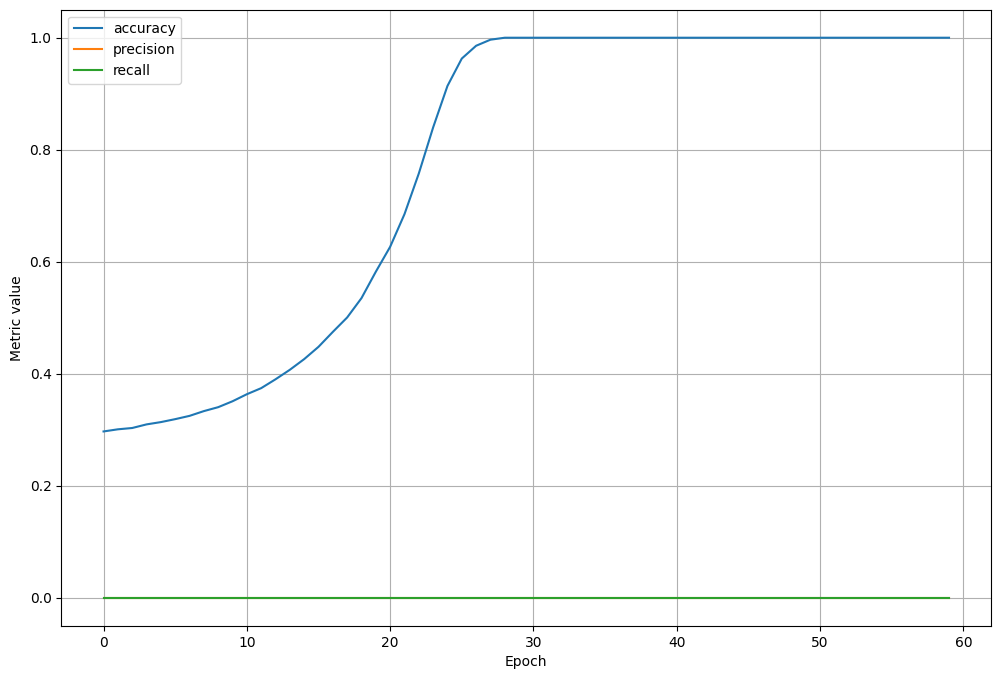

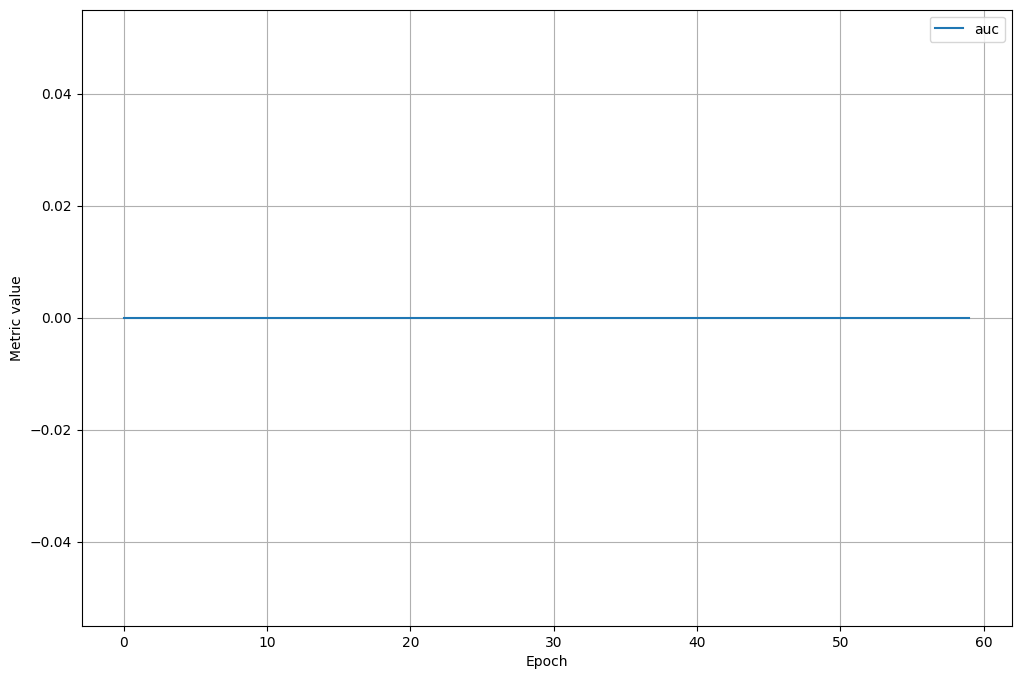

In [80]:
# Let's define our first experiment settings.
settings = ExperimentSettings(
    learning_rate=0.001,
    number_epochs=60,
    batch_size=100,
    classification_threshold=0.35,
    input_features=input_features,
)

metrics = [
    keras.metrics.BinaryAccuracy(
        name='accuracy', threshold=settings.classification_threshold
    ),
    keras.metrics.Precision(
        name='precision', thresholds=settings.classification_threshold
    ),
    keras.metrics.Recall(
        name='recall', thresholds=settings.classification_threshold
    ),
    keras.metrics.AUC(num_thresholds=100, name='auc'),
]

# Establish the model's topography.
model = create_model(settings, metrics)

# Train the model on the training set.
experiment = train_model(
    'baseline', model, train_features, train_labels, settings
)

# Plot metrics vs. epochs
plot_experiment_metrics(experiment, ['accuracy', 'precision', 'recall'])
plot_experiment_metrics(experiment, ['auc'])

In [81]:
def evaluate_experiment(
    experiment: Experiment, test_dataset: pd.DataFrame, test_labels: np.array
) -> dict[str, float]:
  features = {
      feature_name: np.array(test_dataset[feature_name])
      for feature_name in experiment.settings.input_features
  }
  return experiment.model.evaluate(
      x=features,
      y=test_labels,
      batch_size=settings.batch_size,
      verbose=0, # Hide progress bar
      return_dict=True,
  )


def compare_train_test(experiment: Experiment, test_metrics: dict[str, float]):
  print('Comparing metrics between train and test:')
  for metric, test_value in test_metrics.items():
    print('------')
    print(f'Train {metric}: {experiment.get_final_metric_value(metric):.4f}')
    print(f'Test {metric}:  {test_value:.4f}')


# Evaluate test metrics
test_metrics = evaluate_experiment(experiment, test_features, test_labels)
compare_train_test(experiment, test_metrics)

Comparing metrics between train and test:
------
Train accuracy: 1.0000
Test accuracy:  1.0000
------
Train auc: 0.0000
Test auc:  0.0000
------
Train loss: 0.1182
Test loss:  0.1164
------
Train precision: 0.0000
Test precision:  0.0000
------
Train recall: 0.0000
Test recall:  0.0000


In [96]:
import numpy as np
import pandas as pd

def get_user_input(input_features):
    """Function to get user input for each feature in input_features."""
    user_input = {}
    for feature in input_features:
        # You can handle different data types accordingly (e.g., string or numeric inputs)
        value = input(f"Enter value for {feature}: ")

        # Convert the value to the appropriate data type (e.g., float or int)
        if feature in ['income_annum', 'loan_amount', 'cibil_score', 'residential_assets_value',
                       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']:
            value = float(value if value else '0')  # Assuming numeric values for these features
        elif feature in ['no_of_dependents']:
            value = int(value)  # Assuming integer value for this feature
        else:
            value = value.strip()  # For categorical features like 'education', 'self_employed'

        user_input[feature] = value

    return user_input


def predict_approval(model, input_features, user_input):
    """Function to predict if a loan is 'Approved' or 'Not Approved' based on user input."""
    # Convert user input dictionary to a format suitable for model (e.g., DataFrame)
    input_data = pd.DataFrame([user_input], columns=input_features)
    print(input_data)

    # Predict using the model
    prediction = model.predict([input_data['income_annum'],input_data['cibil_score'],input_data['loan_amount']])

    # Since this is a binary classification, threshold the prediction for "Approved" or "Not Approved"
    if prediction[0] > 0.5:  # Assuming the model outputs a probability
        return "Approved"
    else:
        return "Not Approved"

# Example usage
input_features = [
    'income_annum',
    'cibil_score',
    'loan_amount',

]

# Get user input for all the features
user_input = get_user_input(input_features)
print(user_input)
# # Assuming `experiment.model` is your trained model
result = predict_approval(experiment.model, input_features, user_input)

print(f"The loan application is: {result}")


Enter value for income_annum: 1
Enter value for cibil_score: 1
Enter value for loan_amount: 1
{'income_annum': 1.0, 'cibil_score': 1.0, 'loan_amount': 1.0}
   income_annum  cibil_score  loan_amount
0           1.0          1.0          1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The loan application is: Not Approved


In [ ]:
import numpy as np
import pandas as pd

def get_user_input(input_features):
    """Function to get user input for each feature in input_features."""
    user_input = {}
    for feature in input_features:
        # You can handle different data types accordingly (e.g., string or numeric inputs)
        value = input(f"Enter value for {feature}: ")

        # Convert the value to the appropriate data type (e.g., float or int)
        if feature in ['income_annum', 'loan_amount', 'cibil_score', 'residential_assets_value',
                       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']:
            value = float(value)  # Assuming numeric values for these features
        elif feature in ['no_of_dependents']:
            value = int(value)  # Assuming integer value for this feature
        else:
            value = value.strip()  # For categorical features like 'self_employed'

        user_input[feature] = value

    return user_input

def predict_approval(model, input_features, user_input):
    """Function to predict if a loan is 'Approved' or 'Not Approved' based on user input."""
    # Convert user input dictionary to a format suitable for model (e.g., DataFrame)
    input_data = pd.DataFrame([user_input], columns=input_features)

    # Predict using the model
    prediction = model.predict(input_data)

    # Since this is a binary classification, threshold the prediction for "Approved" or "Not Approved"
    if prediction[0] > 0.5:  # Assuming the model outputs a probability
        return "Approved"
    else:
        return "Not Approved"

# Example usage
input_features = [
    'no_of_dependents', 'self_employed', 'income_annum',
    'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
    'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'
]

# Get user input for all the features except 'education'
user_input = get_user_input(input_features)

# Assuming `experiment.model` is your trained model
result = predict_approval(experiment.model, input_features, user_input)

print(f"The loan application is: {result}")
